Deep Learning Models using Job Descriptions Text Data and Other Inputs

## Import Libraries

In [1]:
import time
import nltk
from nltk.corpus import stopwords

#NLP
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re

from sklearn.feature_extraction.text import TfidfVectorizer

#Model Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
np.random.seed(0)

In [1]:
#!pip install flask

### Salary Prediction

In [3]:
df = pd.read_csv("salary_final_2.csv")

In [4]:
#Categorical target
target_class = df['Salary_Bins'].astype('category')

In [5]:
text = df['combined_text']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(text, target_class, test_size=0.1, random_state=4)

In [7]:
#This works for individual job description, but how to save the model? 
tdidf = TfidfVectorizer(sublinear_tf = True, min_df=0.01, max_df=0.5, ngram_range=(1,3), stop_words='english')
fitted_vectorizer = tdidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=3).fit(tfidf_vectorizer_vectors, y_train)

In [8]:
#save the vectorizer to disk

pickle.dump(fitted_vectorizer, open("fitted_vectorizer.pickle", "wb"))

In [9]:
#save the machine learning model to disk

filename='finalized_model_2.h5'
pickle.dump(model, open(filename, 'wb'))

In [10]:
#save the machine model using joblib

from joblib import dump, load
dump(model, 'finalized_model_2.joblib')
clf = load('finalized_model_2.joblib')

In [13]:
#load the model from disk

tfidf_vectorizer = pickle.load(open('fitted_vectorizer.pickle','rb'))
result = clf.predict(tfidf_vectorizer.transform([job]))


In [14]:
labels=['Below 50,000','50,000-70,000','70,000-90,000','90,000-120,000','120,000-150,000','150,000 and Above']

In [15]:
#Test
labels[result[0]]

'Below 50,000'

In [12]:
job = """The Simons Foundation is a private foundation established in 1994 in New York City by Jim and Marilyn Simons. With an annual grants and programs budget of $300 million, the foundation’s mission is to advance the frontiers of research in mathematics and the basic sciences.

The foundation pursues its mission through its grant-making division, comprising programs in Mathematics & Physical Sciences, Life Sciences, Education & Outreach and autism research, and through its internal research division, the Flatiron Institute.
POSITION SUMMARY

Spectrum ’s award-winning news team is looking for a data analysis intern for the summer.

Spectrum is a web-based autism news site intended for scientists, although we are also read by

many non-scientists.

This is an excellent opportunity for someone comfortable handling large amounts of data and interested in data analysis to gain experience in a fast-paced newsroom.

The internship is 18 hours per week, located at our office in Manhattan. This temporary internship is expected to last for 12 weeks. We offer hands-on mentoring in a supportive and fun work environment.

POTENTIAL FUNCTIONS/RESPONSIBILITIES

Sort, filter and analyze a diverse array of datasets
Clean and prepare datasets for analysis
Fact-check and document data analyses to ensure that they're accurate and reproducible
Create clear, engaging data visualizations using chart-making tools
Brainstorm data visualizations to complement news stories and features
Identify useful data for future stories
Generate story ideas from publicly available data
Research, report and write a data-driven story for your portfolio
Perform any other duties or tasks as assigned or required.
MINIMUM QUALIFICATIONS

Education

A degree or coursework in journalism or statistics is desired but not required
Experience and other requirements

Experience filtering, sorting, and aggregating data
Strong attention to detail
Comfortable with learning new technologies or software
Proficient in Microsoft Excel and/or Google Sheets
Knowledge of R, Python, HTML/CSS, JavaScript, and/or SQL are helpful
"""

In [67]:
a = model.predict(fitted_vectorizer.transform([job]))

In [68]:
labels=['Below 50,000','50,000-70,000','70,000-90,000','90,000-115,000','115,000-150,000','150,000 and Above']

#BINS = [0,50000,70000,90000,115000,150000,400000]

In [69]:
labels[a[0]]

'Below 50,000'

### Word Cloud

In [21]:
!pip install wordcloud

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

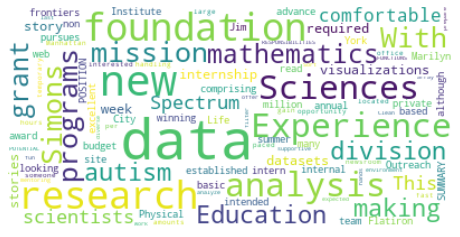

In [17]:

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["to","sex","may","Ability to","Full time","Experience with", "Job Type"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(job)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
SGD = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,3), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=3))
])

In [84]:
SGD.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=0.01,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabu...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                     

In [85]:
y_pred = SGD.predict(X_test)

Confusion Matrix

In [79]:
confusion_matrix(y_test, y_pred)

array([[ 9,  2,  0,  1,  0,  0],
       [ 1, 13,  3,  0,  0,  0],
       [ 1,  3,  8,  1,  0,  0],
       [ 0,  1,  2, 14,  1,  0],
       [ 0,  1,  1,  3, 11,  0],
       [ 1,  2,  0,  2,  5, 11]])

In [86]:
#Mean accuracy on the given test data and labels
SGD.score(X_test, y_test)

0.6907216494845361

In [17]:
#salary_predictor.py 

#Clean single job description
def clean_word(jd):
    
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','covid','non','pm','am','eg','e','g','ie','i']
    
    jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
    jd_tokens=[word.lower() for word in jd_tokens_raw]
    cleaned_text = [word for word in jd_tokens if word not in stopwords_list]
    

    return cleaned_text # Turn to words to use in count vectorizer 
